<a href="https://colab.research.google.com/github/MatteoM04/MatteoM04.github.io/blob/master/Machine_Learning_With_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.patheffects as path_effects

file_path = '/content/drive/MyDrive/Cleaned_Data_NoNaT.csv'
df = pd.read_csv(file_path)
df.head()

,Extent,Instrument,Max Spectral Range (eV),Min Spectral Range (eV),Observable,Source,Thumbnail,Time End,Time Start
0,FULLDISK,T1-HALPHA,1.889194,1.889194,Intensity,SFT,https://solarwww.mtk.nao.ac.jp/mitaka_solar/h...,2025-03-31 00:18:36,2025-03-31 00:18:36
1,FULLDISK,T1-HALPHA,1.889194,1.889194,Intensity,SFT,https://solarwww.mtk.nao.ac.jp/mitaka_solar/h...,2025-03-31 00:18:36,2025-03-31 00:18:36
2,FULLDISK,T1-HALPHA,1.889194,1.889194,Intensity,SFT,https://solarwww.mtk.nao.ac.jp/mitaka_solar/h...,2025-03-31 00:48:42,2025-03-31 00:48:36
3,FULLDISK,T1-HALPHA,1.889194,1.889194,Intensity,SFT,https://solarwww.mtk.nao.ac.jp/mitaka_solar/h...,2025-03-31 00:48:36,2025-03-31 00:48:36
4,FULLDISK,T1-HALPHA,1.889194,1.889194,Intensity,SFT,https://solarwww.mtk.nao.ac.jp/mitaka_solar/h...,2025-03-31 01:18:42,2025-03-31 01:18:42


The following code shows the Local Outlier Factor (LOF)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


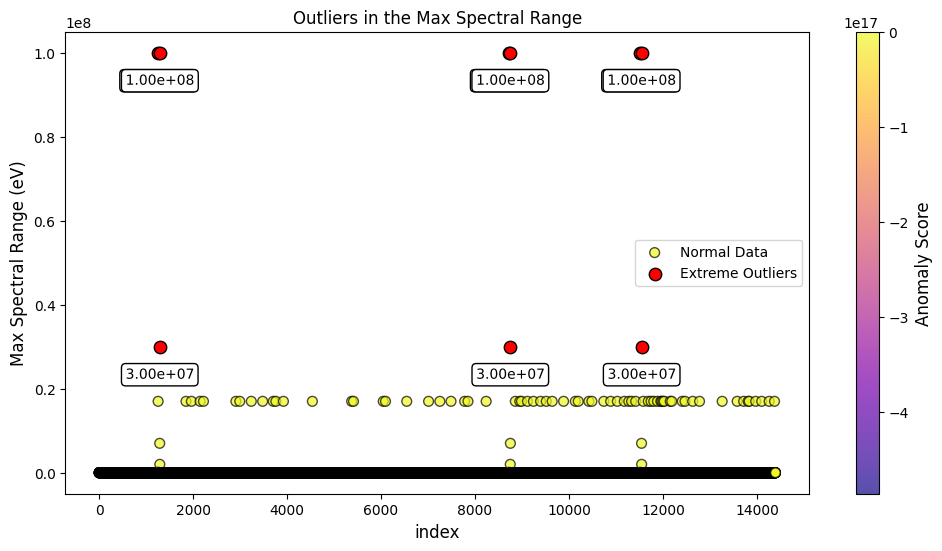

In [5]:
column_name = 'Max Spectral Range (eV)'
x = df[[column_name]].values
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['Anomaly_Score'] = -lof.fit_predict(x)
df['Anomaly_LOF'] = lof.negative_outlier_factor_
threshold = np.percentile(df['Anomaly_LOF'], 0.1)

plt.figure(figsize=(12, 6))
sc = plt.scatter(df.index, df[column_name], c=df['Anomaly_LOF'], cmap='plasma', edgecolors='black', s=50, alpha=0.7)

for i in range(len(df)):
  if df['Anomaly_LOF'].iloc[i] < threshold:
    plt.scatter(df.index[i], df[column_name].iloc[i], color='red', s=80, edgecolors='black')
    y_offset = -0.05 * (df[column_name].max() - df[column_name].min())
    x_offset = 0
    va = 'bottom' if df[column_name].iloc[i] < df[column_name].median() else 'top'

    #annotates with the background padding for clarity
    text = plt.text(df.index[i], df[column_name].iloc[i] + y_offset, f'{df[column_name].iloc[i]:.2e}', ha='center', va=va, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    #adds the outline for better point visablity
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])

cbar = plt.colorbar(sc)
cbar.set_label('Anomaly Score', fontsize=12)
plt.xlabel('index', fontsize=12)
plt.ylabel(column_name, fontsize=12)
plt.legend(['Normal Data', 'Extreme Outliers'], loc='center right')
plt.title('Outliers in the Max Spectral Range')
plt.show()

#OpenAI. (2025). ChatGPT [Large language model]. https://chat.openai.com/chat